## In questa sezione importiamo tutte le librerie necessarie: `face_recognition` per l'elaborazione dei volti, `cv2` per la gestione dei flussi video tramite OpenCV, e `numpy` per operazioni matematiche e gestione dei dati numerici.

In [86]:
import face_recognition
import cv2
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

## Carica il video da file

In [87]:
video_capture = cv2.VideoCapture("dataset/test.mp4")
if not video_capture.isOpened():
    print("Errore: impossibile aprire test.mp4")
    exit()

## Imposta il salvataggio del video di output

In [88]:
fps = video_capture.get(cv2.CAP_PROP_FPS)
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("output.mp4", fourcc, fps, (width, height))

## Carica le immagini dei volti noti e calcola le codifiche

In [89]:
stenni_image = face_recognition.load_image_file("dataset/stefano.jpg")
stenni_face_encoding = face_recognition.face_encodings(stenni_image)[0]

antonio_image = face_recognition.load_image_file("dataset/antonio.jpg")
antonio_face_encoding = face_recognition.face_encodings(antonio_image)[0]

raoul_image = face_recognition.load_image_file("dataset/raoul.jpg")
raoul_face_encoding = face_recognition.face_encodings(raoul_image)[0]

 ## Array con codifiche e nomi dei volti noti

In [90]:
known_face_encodings = [
    stenni_face_encoding,
    antonio_face_encoding,
    raoul_face_encoding
]
known_face_names = [
    "Stefano",
    "Antonio",
    "Raoul"
]

## Inizializza le variabili

In [91]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

## Loop principale del riconoscimento:

- Campionamento video ottimizzato
- Riconoscimento volti e coordinate per frame
- Matching volti con dataset
- Visulizzazione dei risultati tramite box

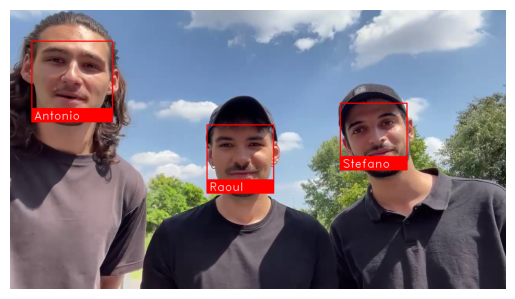

In [92]:
while True:
    # Acquisisce un singolo frame dal video
    ret, frame = video_capture.read()
    if not ret:
        break

    if process_this_frame:
        # Ridimensiona e converte il frame
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        rgb_small = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

        # Rileva volti e calcola codifiche
        face_locations = face_recognition.face_locations(rgb_small)
        face_encodings = face_recognition.face_encodings(rgb_small, face_locations)

        face_names = []
        for encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
            matches = face_recognition.compare_faces(known_face_encodings, encoding)
            name = "Sconosciuto"
            face_distances = face_recognition.face_distance(known_face_encodings, encoding)

            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append((top, right, bottom, left, name))

    process_this_frame = not process_this_frame

    # Disegna riquadri e etichette
    for top, right, bottom, left, name in face_names:
        top, right, bottom, left = top*4, right*4, bottom*4, left*4
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        cv2.putText(frame, name, (left + 6, bottom - 6),
                    cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 1)

    out.write(frame)

    # Visualizza frame in notebook
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    clear_output(wait=True)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
out.release()
cv2.destroyAllWindows()